Tasks in this notebook:  
* Importing datasets for data cleaning.  
* Saving the clean datasets to work with them later.

In [3]:
#Importing  libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Functions
def cleaning(data):
    print('SHAPE---------------\n',data.shape,'\n')
    print('TYPES---------------\n',data.dtypes,'\n')
    print('NULL VALUES---------\n',data.isna().sum(),'\n')
    print('PLOT----------------\n',data.plot())

In [14]:
#Importing datasets
data_co2 = pd.read_csv('/Users/anna/data/projects/climate-change/datasets/carbondioxide.csv')
data_temp = pd.read_csv('/Users/anna/data/projects/climate-change/datasets/GlobalTemperatures.csv')
data_sea = pd.read_csv('/Users/anna/data/projects/climate-change/datasets/seaice.csv')

## Carbon dioxide

First of all, we have a look at the data to see the information we have and its main characteristics.

In [4]:
data_co2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


SHAPE---------------
 (720, 7) 

TYPES---------------
 Year                                   int64
Month                                  int64
Decimal Date                         float64
Carbon Dioxide (ppm)                 float64
Seasonally Adjusted CO2 (ppm)        float64
Carbon Dioxide Fit (ppm)             float64
Seasonally Adjusted CO2 Fit (ppm)    float64
dtype: object 

NULL VALUES---------
 Year                                  0
Month                                 0
Decimal Date                          0
Carbon Dioxide (ppm)                 17
Seasonally Adjusted CO2 (ppm)        17
Carbon Dioxide Fit (ppm)             13
Seasonally Adjusted CO2 Fit (ppm)    13
dtype: int64 

PLOT----------------
 AxesSubplot(0.125,0.125;0.775x0.755)


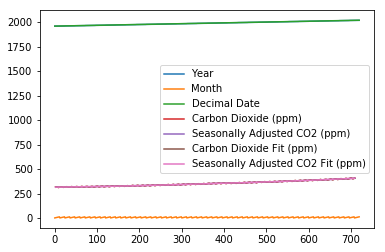

In [5]:
cleaning(data_co2)

In [6]:
# Selecting 'Decimal Date' instead of 'Year' and 'Month' to plot
test = data_co2[['Decimal Date', 'Carbon Dioxide (ppm)',
       'Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)',
       'Seasonally Adjusted CO2 Fit (ppm)']]

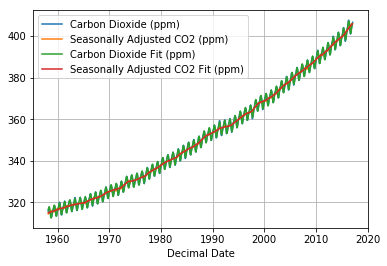

In [7]:
test.plot(x='Decimal Date', grid=True)

The **types** of the columns of Year and Month are integer, it would be better if they were datetime.  
We have a few **null values**, and since they are not a lot (less than 20 out of 720) we will drop them. We could extrapolate but we don't to bias in any way the data.

In [8]:
# Renaming the fifth column since it is the one that we will use more
data_co2.rename(columns={'Seasonally Adjusted CO2 Fit (ppm)':'CO2'}, inplace=True)

In [9]:
#Dropping NaNs
data_co2 = data_co2.dropna().reset_index(drop=True)

In [10]:
data_co2.columns

Index(['Year', 'Month', 'Decimal Date', 'Carbon Dioxide (ppm)',
       'Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)', 'CO2'],
      dtype='object')

In [11]:
# Reorganizing columns
data_co2 = data_co2[['Decimal Date', 'Year', 'Month', 'CO2', 'Carbon Dioxide (ppm)', 'Seasonally Adjusted CO2 (ppm)', 
                     'Carbon Dioxide Fit (ppm)']]

In [12]:
data_co2.head()

,Decimal Date,Year,Month,CO2,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm)
0,1958.2027,1958,3,314.89,315.69,314.42,316.18
1,1958.2877,1958,4,314.98,317.45,315.15,317.30
2,1958.3699,1958,5,315.06,317.50,314.73,317.83
3,1958.5370,1958,7,315.21,315.86,315.17,315.87
4,1958.6219,1958,8,315.29,314.93,316.17,314.01


## Saving clean dataset

In [13]:
data_co2.to_csv('/Users/anna/data/projects/climate-change/datasets/clean_co2.csv', index=False)

## Temperature

Repeating the process of checking the information of the dataset, types of columns and NaNs.

In [14]:
data_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


SHAPE---------------
 (3192, 9) 

TYPES---------------
 dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object 

NULL VALUES---------
 dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatur

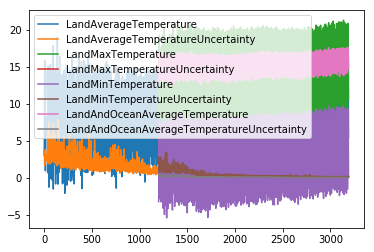

In [15]:
cleaning(data_temp)

In [16]:
# Selecting columns we need and renaming
temp = data_temp.rename(columns = {'dt':'Date', 'LandAndOceanAverageTemperature':'AvgTemp'})
temp = temp[['Date', 'AvgTemp']]

In [17]:
# Changing Date column to datetime type
temp.Date = pd.to_datetime(temp.Date)

In [18]:
#Dropping NaNs
temp = temp.dropna().reset_index(drop=True)

In [19]:
#Saving clean dataset
temp.to_csv('/Users/anna/data/projects/climate-change/datasets/clean_temp.csv', index=False)

## Sea ice

Repeating the process of checking the information of the dataset, types of columns and NaNs.

In [15]:
data_sea.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north


SHAPE---------------
 (24908, 7) 

TYPES---------------
 Year             int64
Month            int64
Day              int64
Extent         float64
Missing        float64
Source Data     object
hemisphere      object
dtype: object 

NULL VALUES---------
 Year           0
Month          0
Day            0
Extent         0
Missing        0
Source Data    0
hemisphere     0
dtype: int64 

PLOT----------------
 AxesSubplot(0.125,0.125;0.775x0.755)


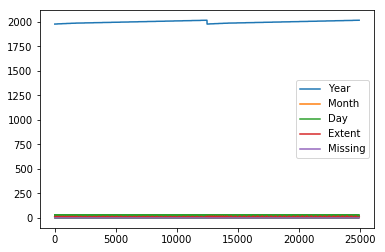

In [16]:
cleaning(data_sea)

The types of some columns are wrong, we will have to change Year, Month and Day to datetime.   
Missing and Source columns seem to have no useful information for us.  
We have no null values.  

In [17]:
# Dropping columns we don't want
data_sea.drop(['Source Data', 'Missing'], axis=1, inplace=True) 

Let's create a column with the proper date, merging Year, Month and Day.

In [18]:
data_sea['Date'] = pd.to_datetime(data_sea[['Year', 'Month', 'Day']])
data_sea.head()

,Year,Month,Day,Extent,hemisphere,Date
0,1978,10,26,10.231,north,1978-10-26
1,1978,10,28,10.420,north,1978-10-28
2,1978,10,30,10.557,north,1978-10-30
3,1978,11,1,10.670,north,1978-11-01
4,1978,11,3,10.777,north,1978-11-03


In [19]:
# Reorganizing and selecting columns
data_sea = data_sea[['Date','Year', 'Month',  'Day', 'Extent','hemisphere']]
data_sea.head()

,Date,Year,Month,Day,Extent,hemisphere
0,1978-10-26,1978,10,26,10.231,north
1,1978-10-28,1978,10,28,10.420,north
2,1978-10-30,1978,10,30,10.557,north
3,1978-11-01,1978,11,1,10.670,north
4,1978-11-03,1978,11,3,10.777,north


Just for aesthetics, we will change the hemisphere names to capitalized words. 

In [31]:
data_sea["hemisphere"] = data_sea["hemisphere"].replace('north', 'North') 
data_sea["hemisphere"] = data_sea["hemisphere"].replace('south', 'South') 

In [33]:
data_sea.head()

,Date,Year,Month,Day,Extent,hemisphere
0,1978-10-26,1978,10,26,10.231,North
1,1978-10-28,1978,10,28,10.420,North
2,1978-10-30,1978,10,30,10.557,North
3,1978-11-01,1978,11,1,10.670,North
4,1978-11-03,1978,11,3,10.777,North


In [34]:
#Saving clean dataset
data_sea.to_csv('/Users/anna/data/projects/climate-change/datasets/clean_ice.csv', index=False)